In [1]:
# Parameters
base_result_filename = "conditional_covariances/analyzed_covariance_results_{}.npz"
results_dir = "../.."
kde_bounds = None
right_y_title = ""
transformation_name = "identity"
start_indices = [0, 2]
metric_name = "rel_error"
y_title = "Relative Error w.r.t. Truth"


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from plot_utils import corrExpmtSetupsPlotter as Plotter

In [4]:
transformations = {'identity': (lambda x: x), 'butterfly': (lambda x: -np.log(1. - x)/np.log(10.))}
transformation = transformations[transformation_name]

In [5]:
plotter = Plotter(base_result_filename, results_dir, kde_bounds=kde_bounds)

In [6]:
performance = plotter.load_performance_results(metric_name)
performance = transformation(performance)

### Averages of Normalized

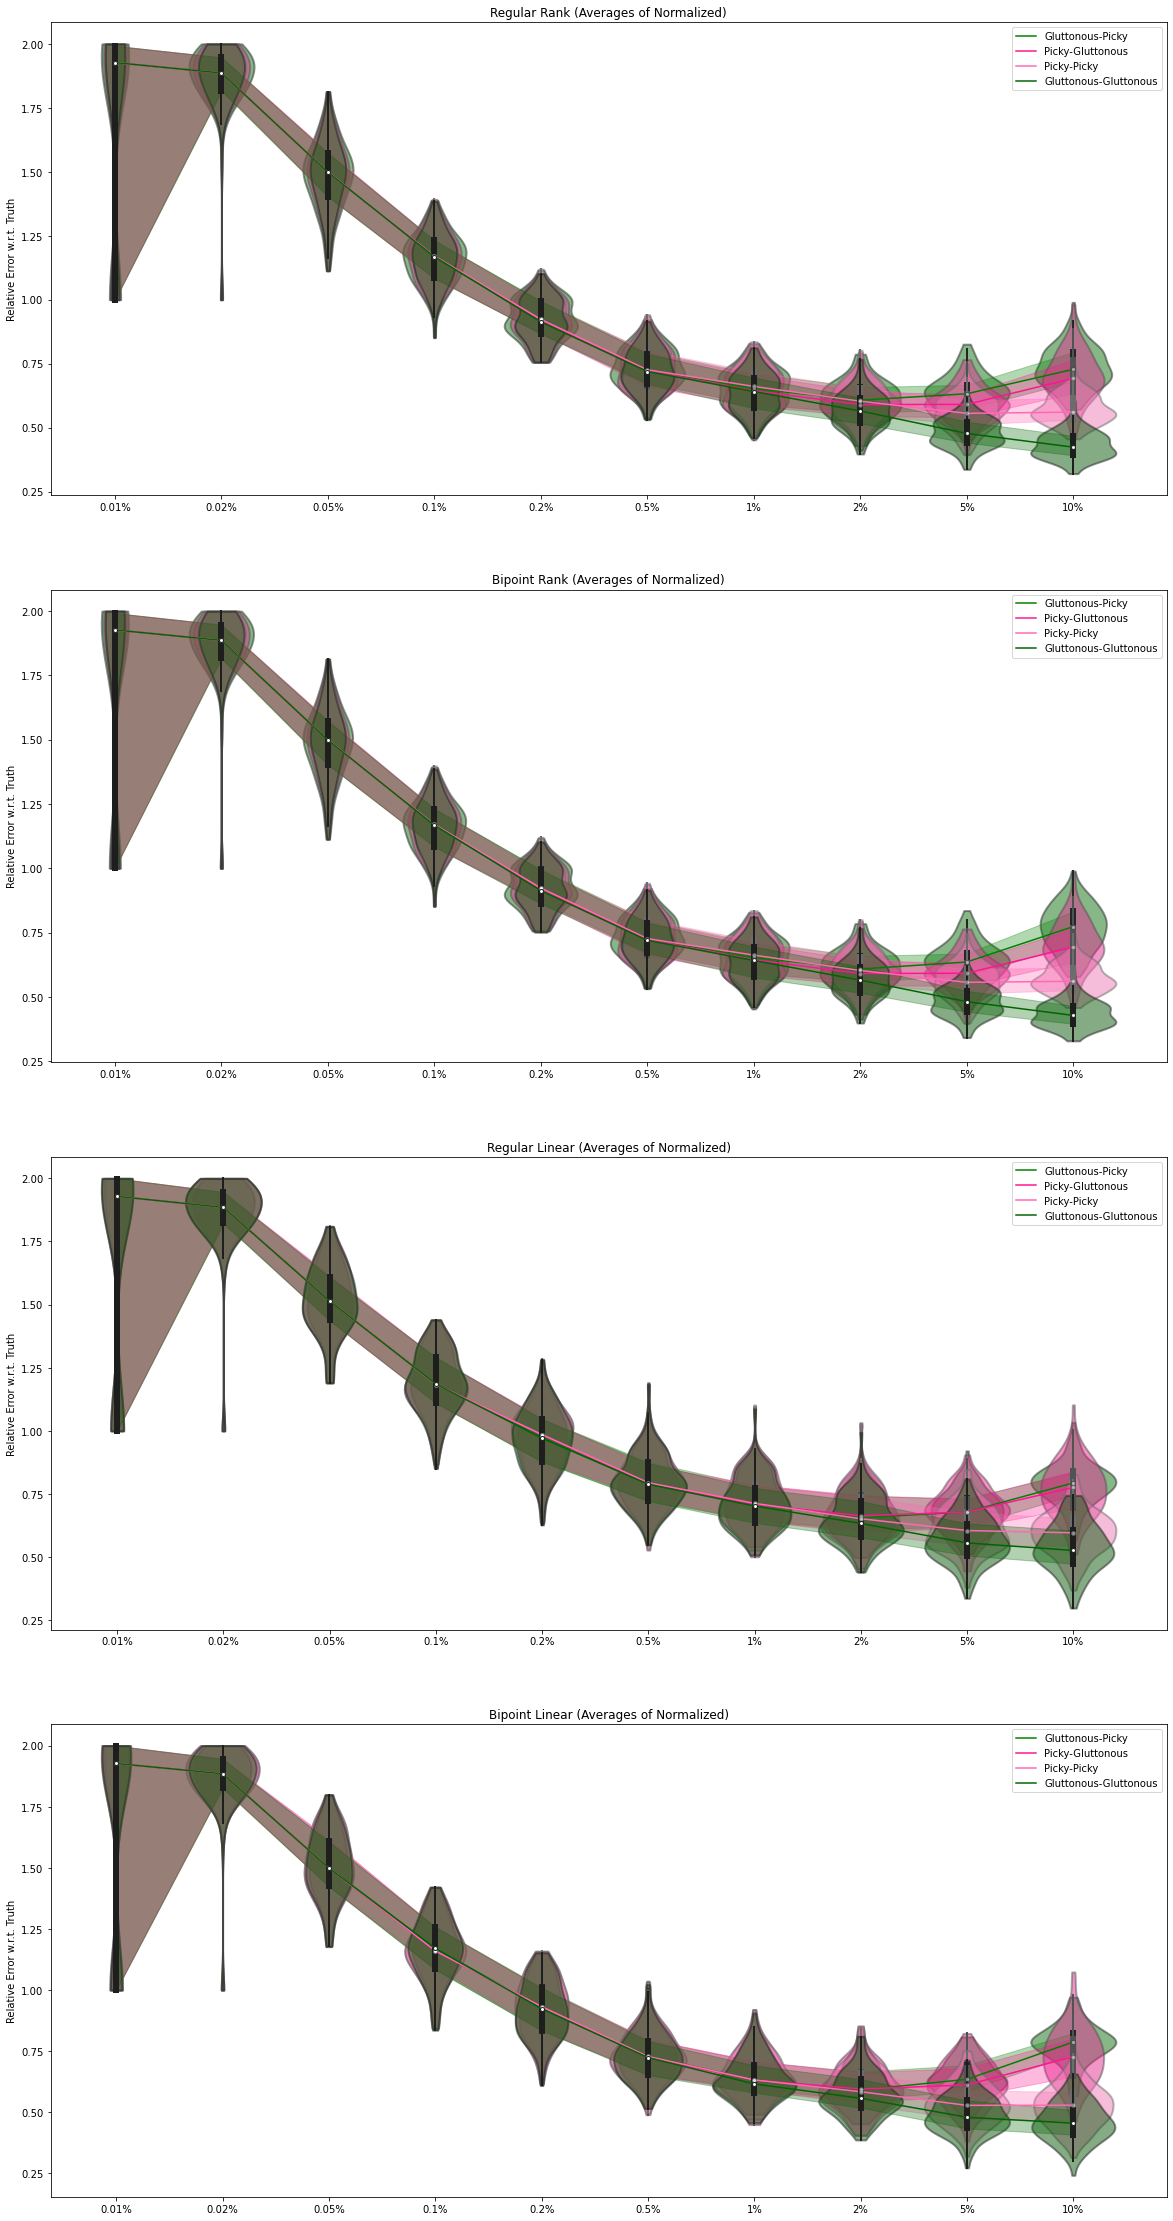

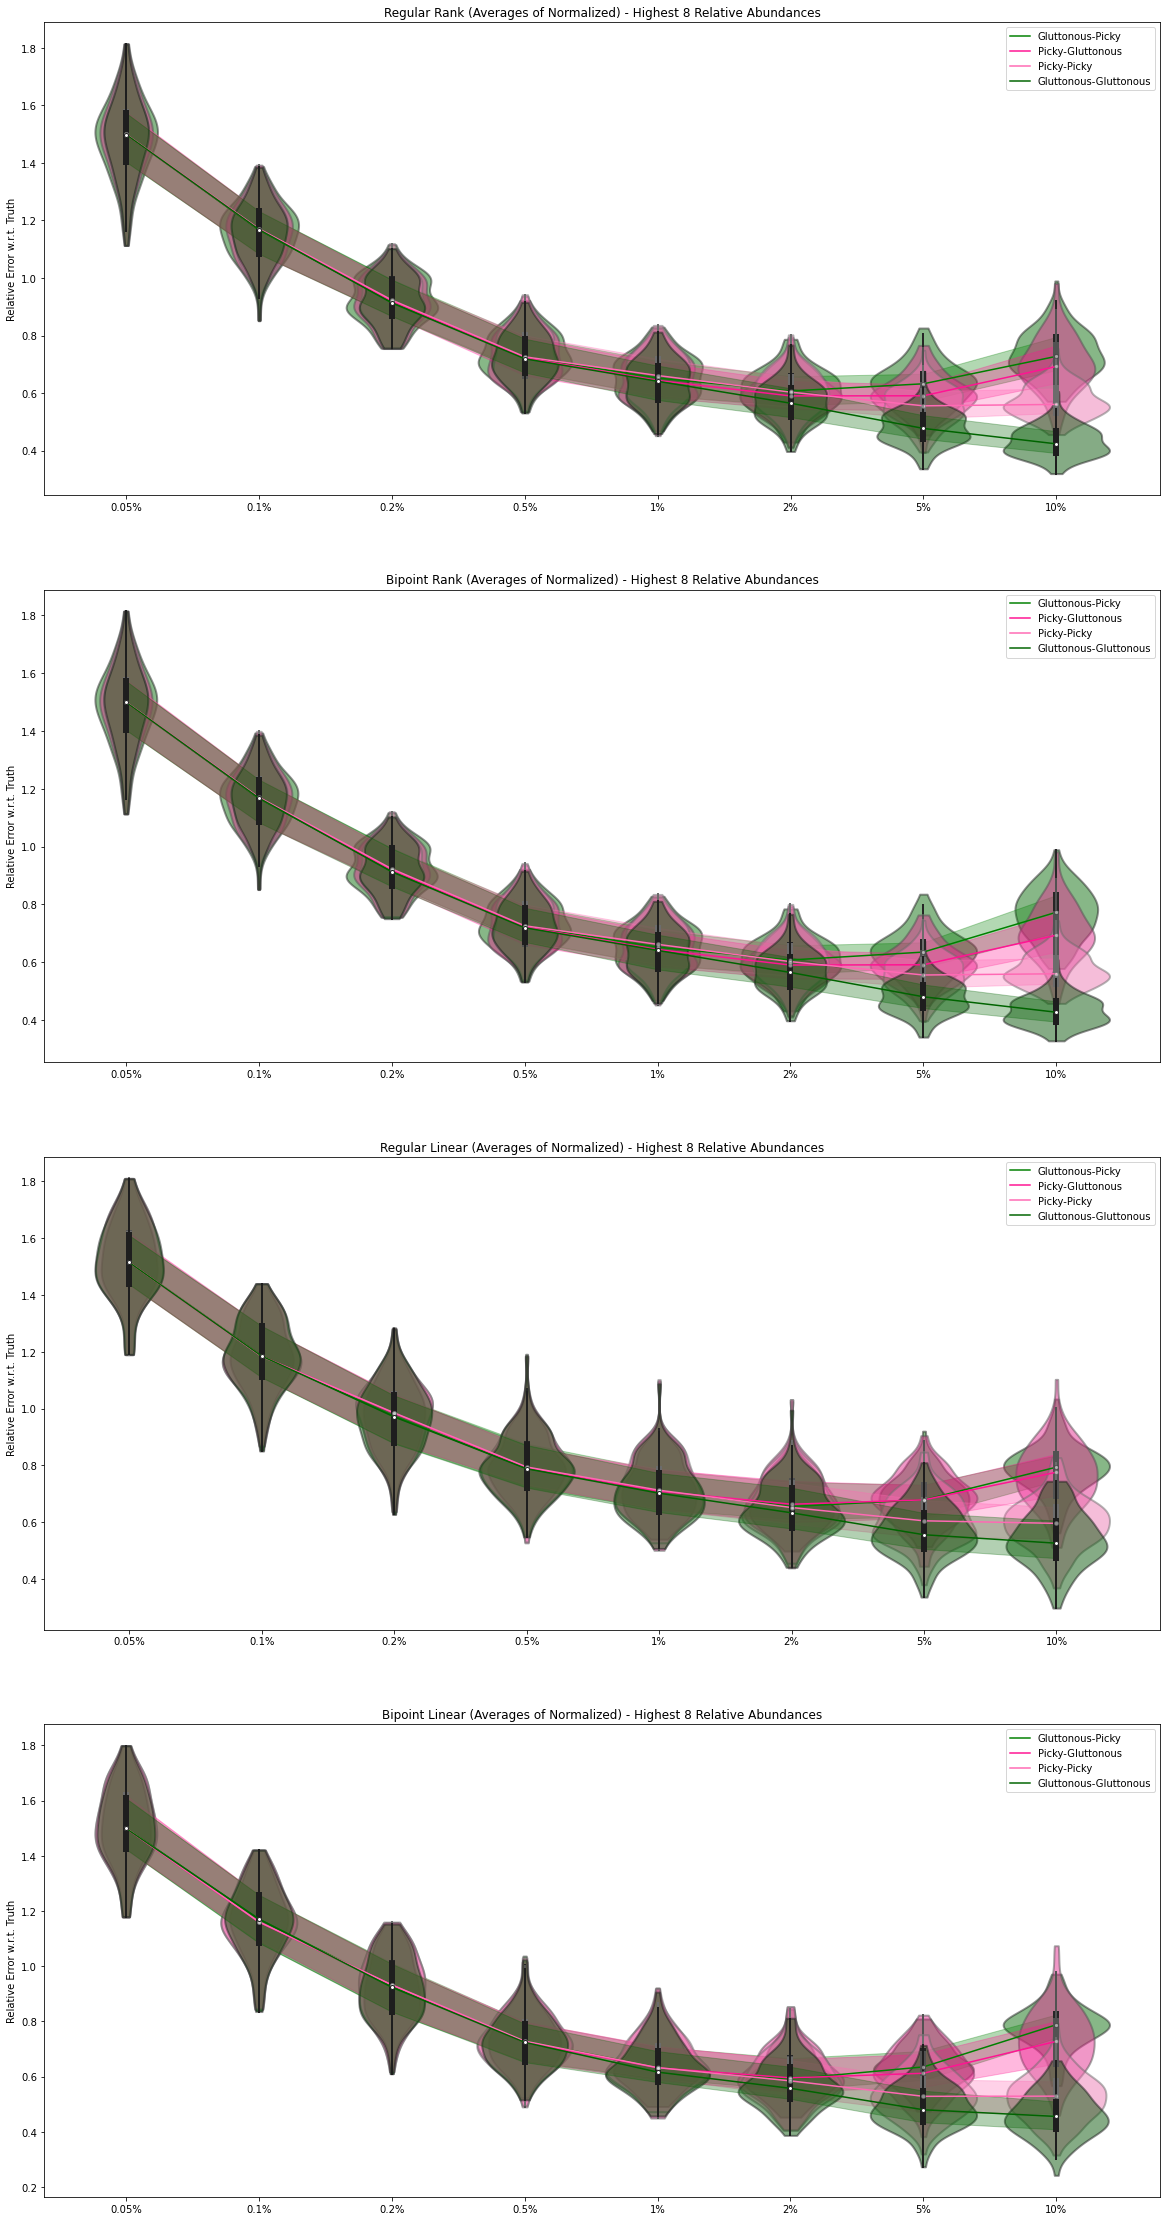

In [7]:
for start_index in start_indices:
    axes = plotter.plot_all_variants(performance, avg_type='normalized', y_title=y_title, start_index=start_index)
    if transformation_name == 'butterfly':
        for ax in axes:
            plotter.annotate_important_log_scores(ax, right_y_title)

### Averages of Unnormalized

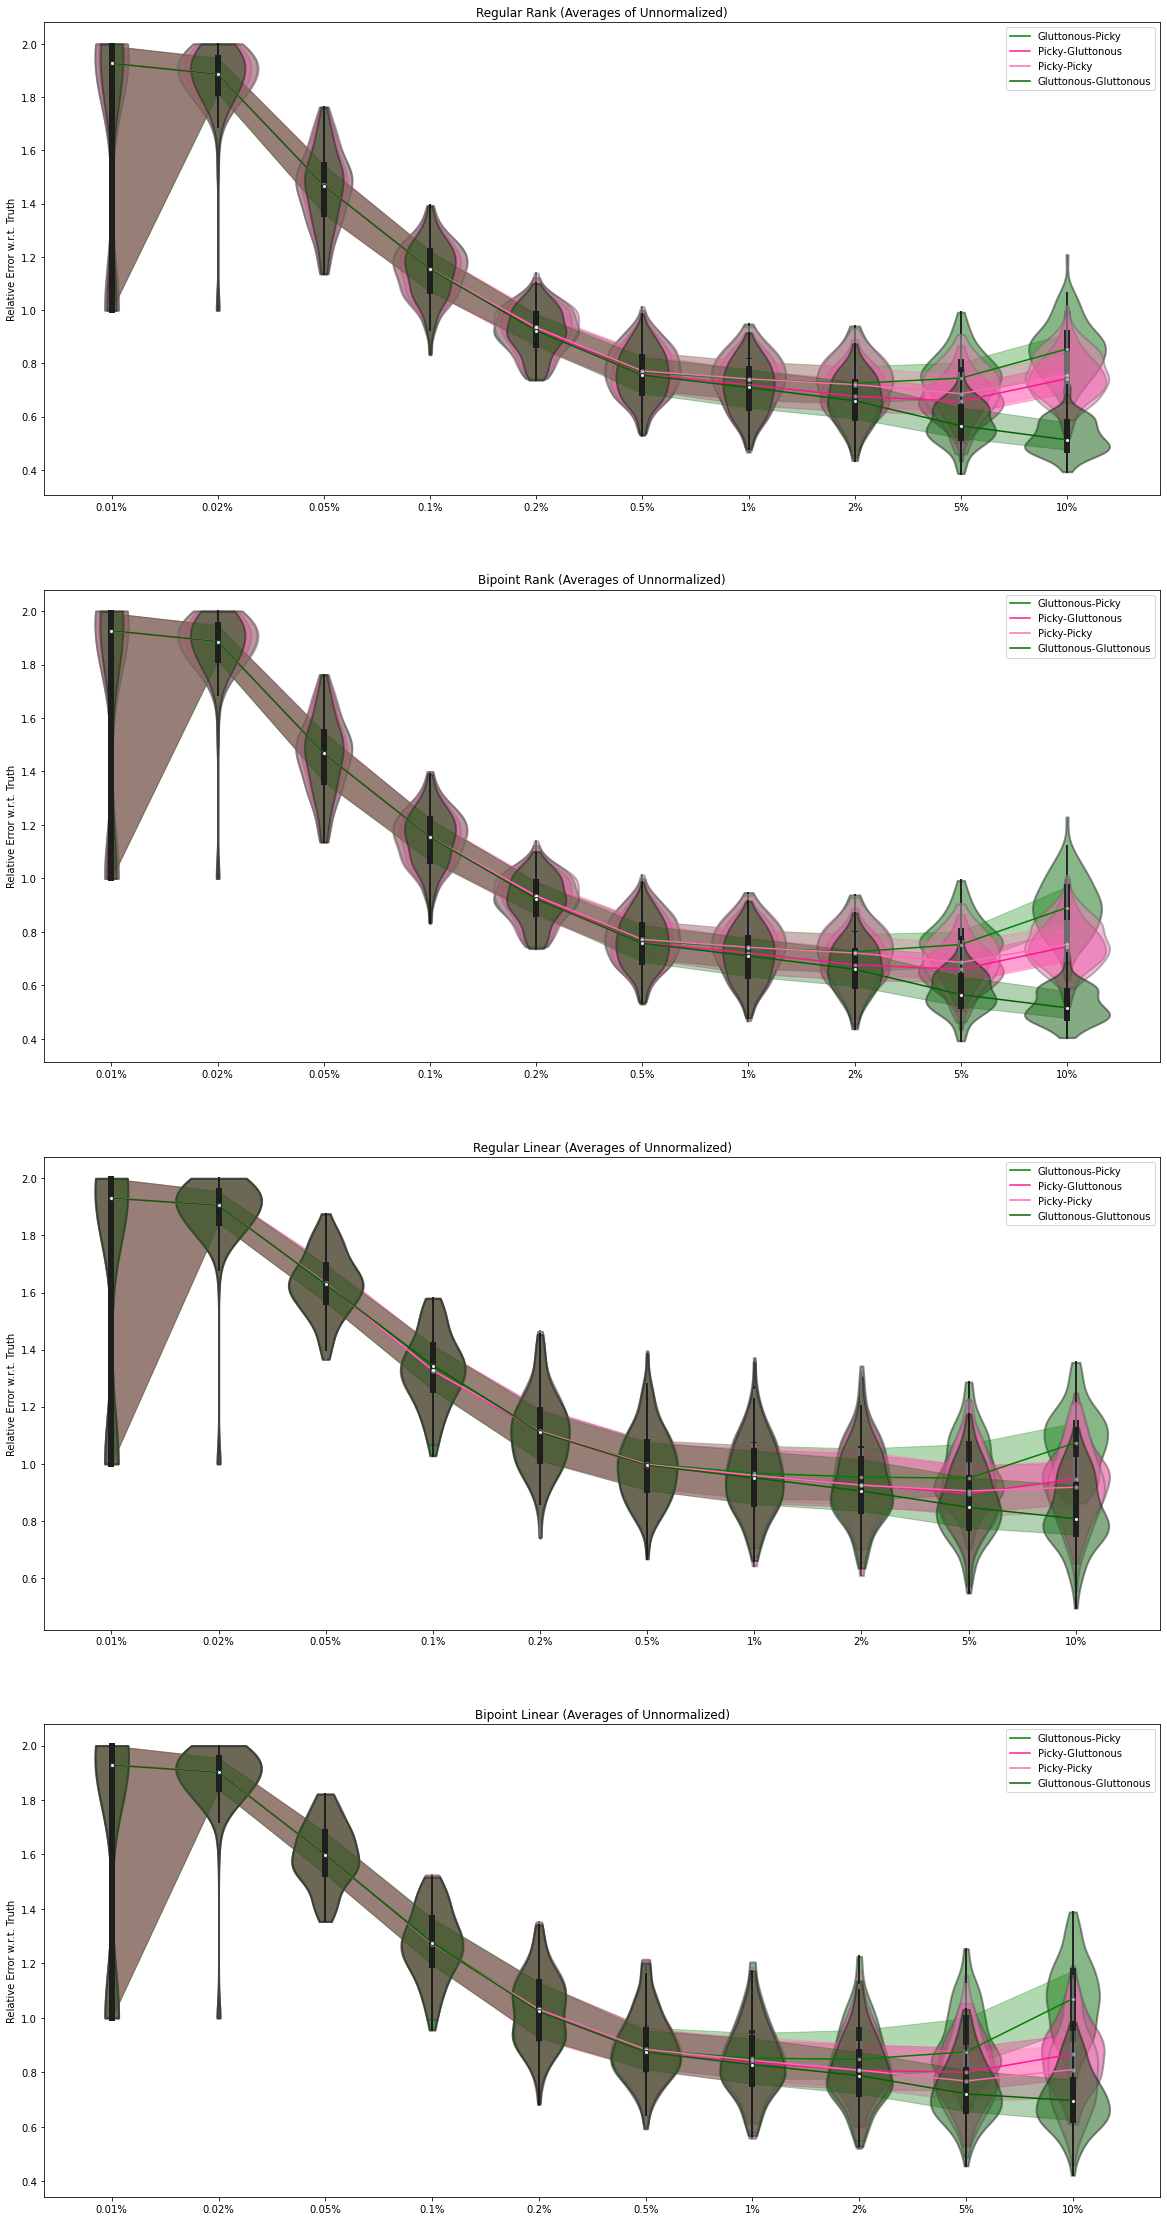

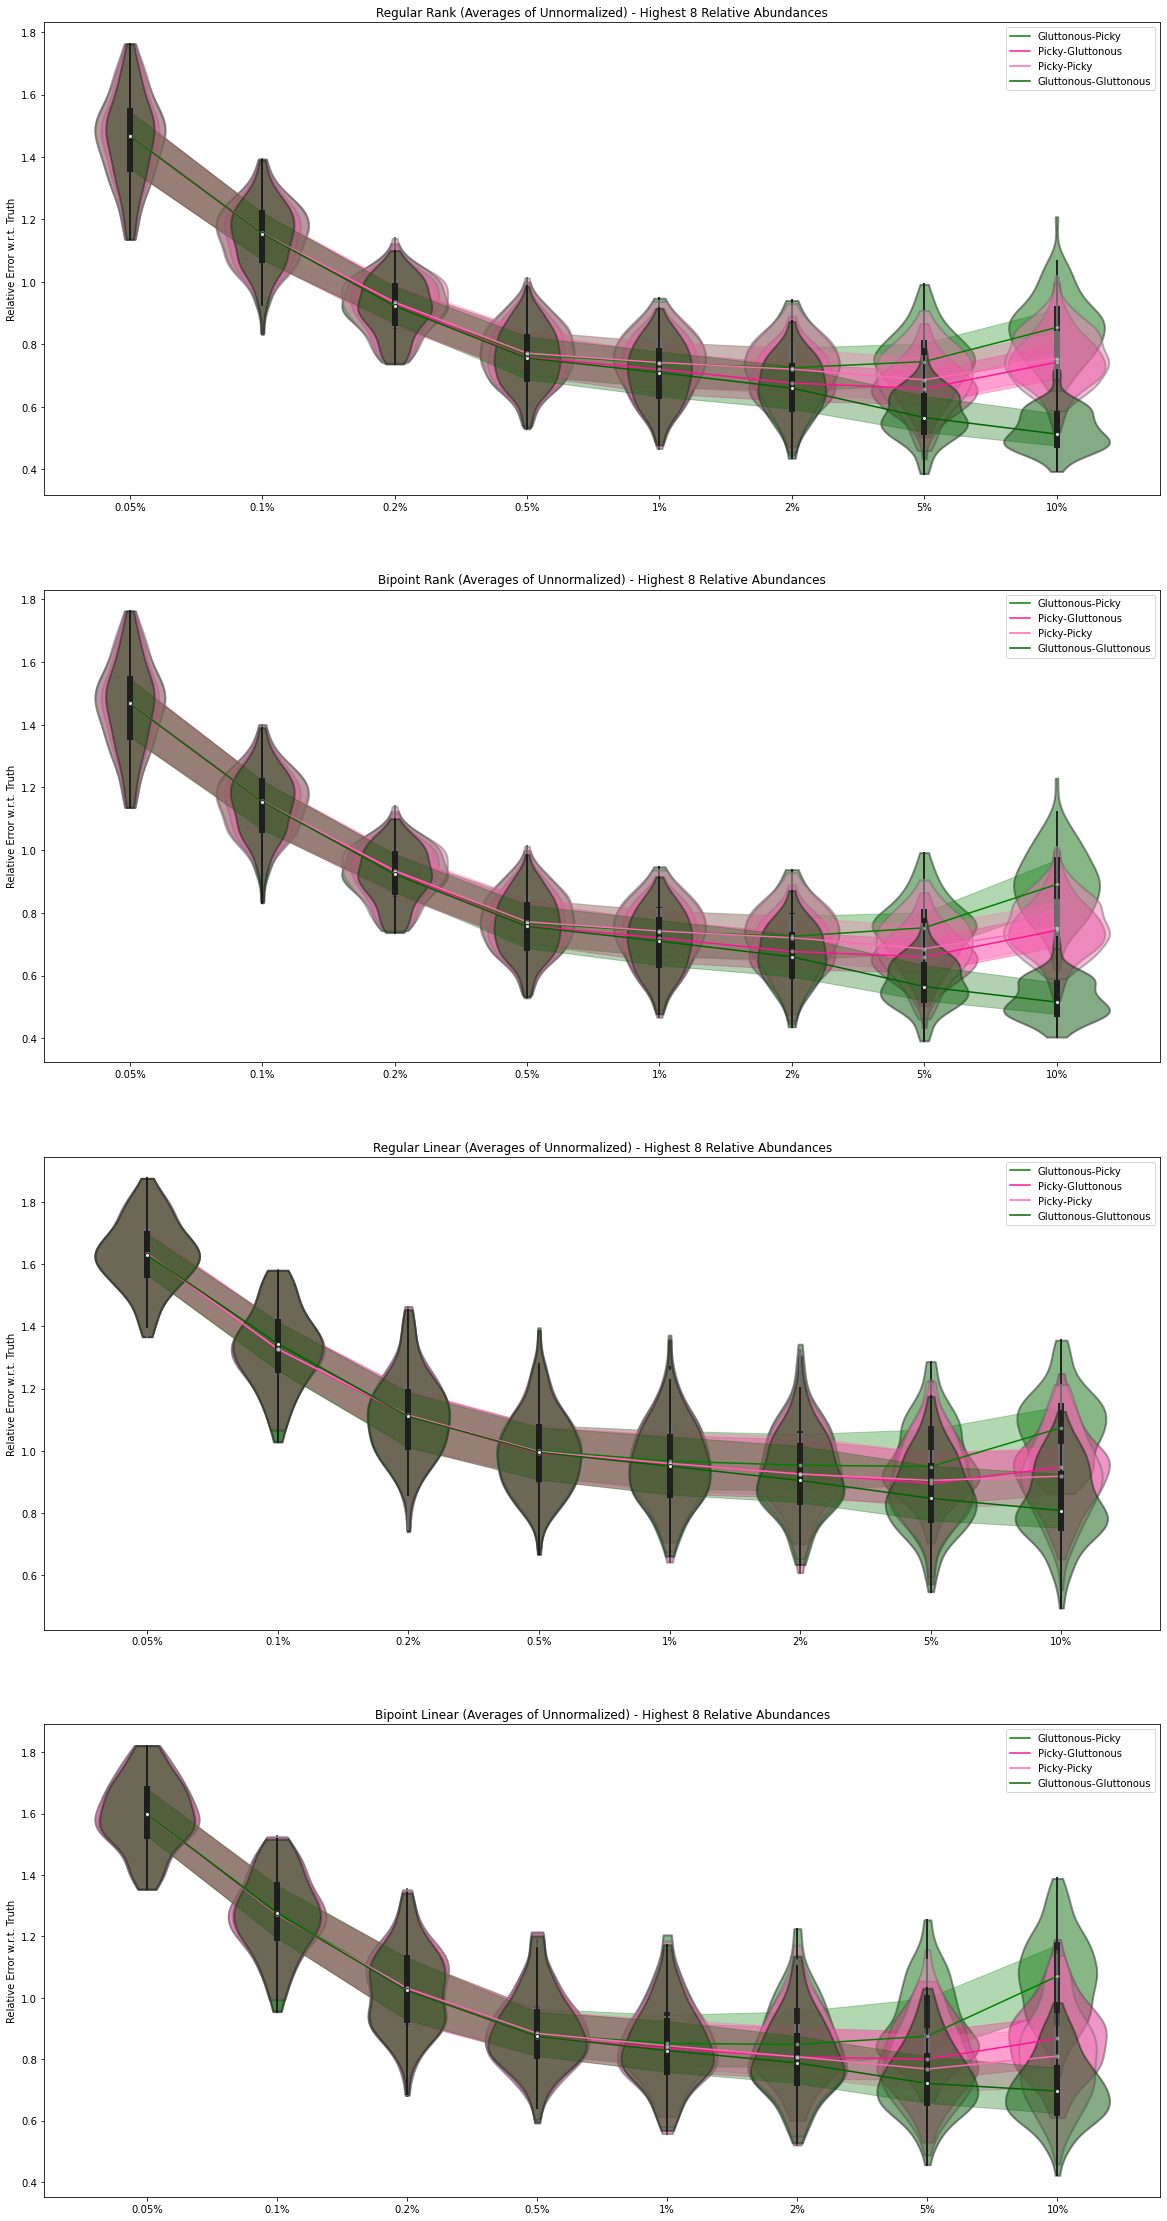

In [8]:
for start_index in start_indices:
    axes = plotter.plot_all_variants(performance, avg_type='unnormalized', y_title=y_title, start_index=start_index)
    if transformation_name == 'butterfly':
        for ax in axes:
            plotter.annotate_important_log_scores(ax, right_y_title)